# Communicating Results Quiz
Now let's answer the same questions found in "Drawing Conclusions Quiz" using visualizations.\
Using the grocery store dataset `store_data.csv` , create plots with appropriate labeling, colors and size to communicate the results of the following questions.

Which store has the highest total sales for the last month?\ <br>Store B<br>
Which store makes the most sales on average?\ <br>Store B<br>
Which store sells the most during the week of March 13th, 2016?\ <br>Store D<br>
Which store has the most sales in the latest 3-month period?\ <br> Store A<br>
**Which store is the most consistent ? (important)**   <br>Store D

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the data
df=pd.read_csv("store_data.csv")
df.head()

,week,storeA,storeB,storeC,storeD,storeE
0,2014-05-04,2643,8257,3893,6231,1294
1,2014-05-11,6444,5736,5634,7092,2907
2,2014-05-18,9646,2552,4253,5447,4736
3,2014-05-25,5960,10740,8264,6063,949
4,2014-06-01,7412,7374,3208,3985,3023


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   week    200 non-null    object
 1   storeA  200 non-null    int64 
 2   storeB  200 non-null    int64 
 3   storeC  200 non-null    int64 
 4   storeD  200 non-null    int64 
 5   storeE  200 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 9.5+ KB


In [4]:
df['week'] = pd.to_datetime(df['week'])
df.dtypes

week      datetime64[ns]
storeA             int64
storeB             int64
storeC             int64
storeD             int64
storeE             int64
dtype: object

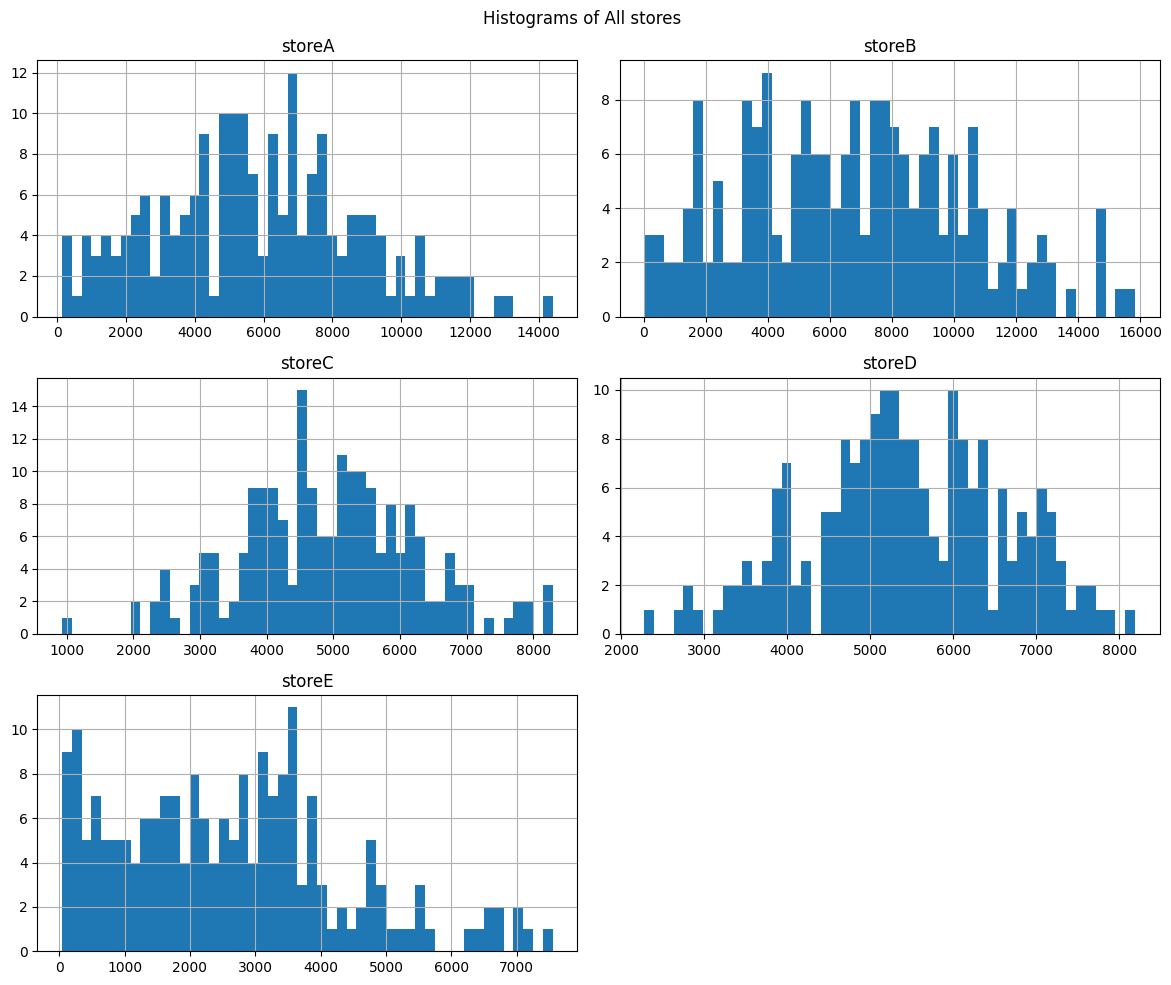

In [5]:
# explore the data (use plots only)

# Select only the numeric columns in the DataFrame
numeric_data = df.select_dtypes(include='number')

# Plot histograms of all numeric columns
numeric_data.hist(bins=50, figsize=(12, 10))

# Set the title and axis labels
plt.suptitle('Histograms of All stores')
plt.tight_layout()
plt.show()


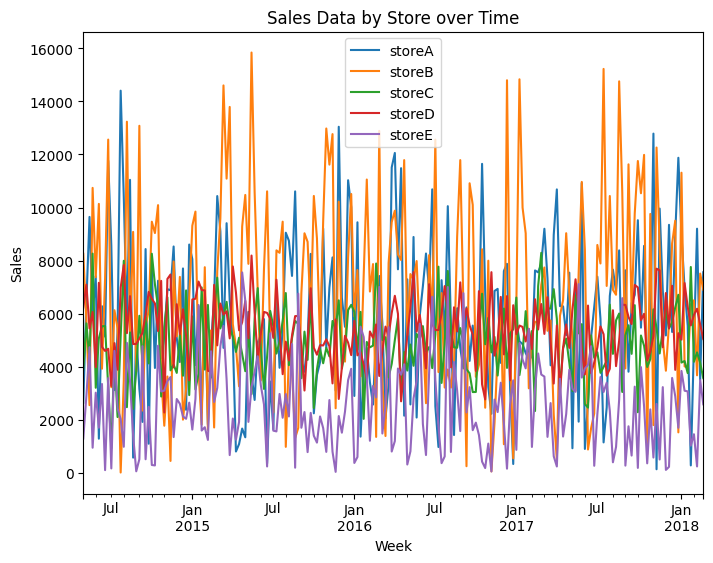

In [6]:
# Set the "week" column as the index
df.set_index('week', inplace=True)

# Create a line plot of the sales data for all columns
df.plot(kind='line', figsize=(8, 6))

# Set the title and axis labels
plt.title('Sales Data by Store over Time')
plt.xlabel('Week')
plt.ylabel('Sales')

# Show the plot
plt.show()

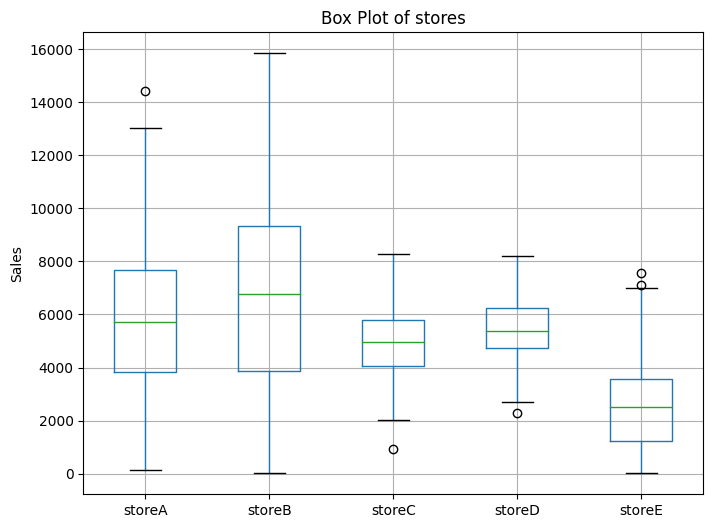

In [7]:
# Create a box plot for each column in the DataFrame
df.boxplot(figsize=(8, 6))

# Set the title and axis labels
plt.title('Box Plot of stores')
plt.ylabel('Sales')

# Show the plot
plt.show()

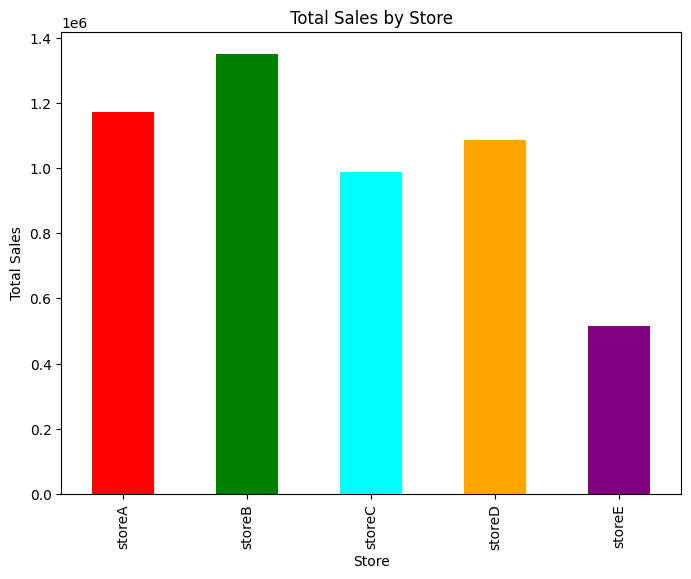

In [8]:
# Calculate the total sales for each store
total_sales = df.sum()

# Define the colors for each bar
colors = ['red', 'green', 'cyan', 'orange', 'purple']

# Create a bar plot of the total sales for all columns
total_sales.plot(kind='bar',color=colors, figsize=(8, 6))

# Set the title and axis labels
plt.title('Total Sales by Store')
plt.xlabel('Store')
plt.ylabel('Total Sales')

# Show the plot
plt.show()


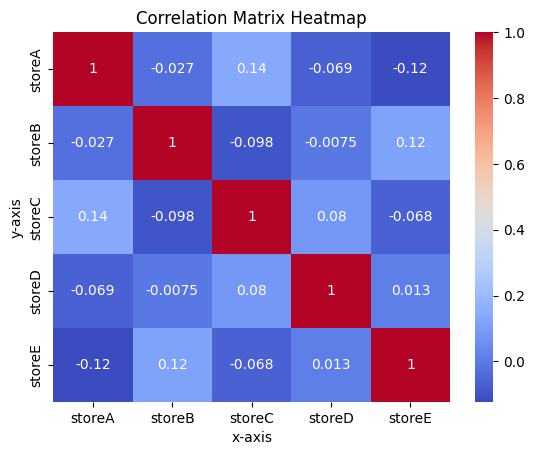

In [9]:
# Calculate the correlation matrix between all columns
corr_matrix = numeric_data.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Set the title and axis labels
plt.title('Correlation Matrix Heatmap')
plt.xlabel('x-axis')
plt.ylabel('y-axis')

# Show the plot
plt.show();
# visualize the correlation matrix between the sales data for each store

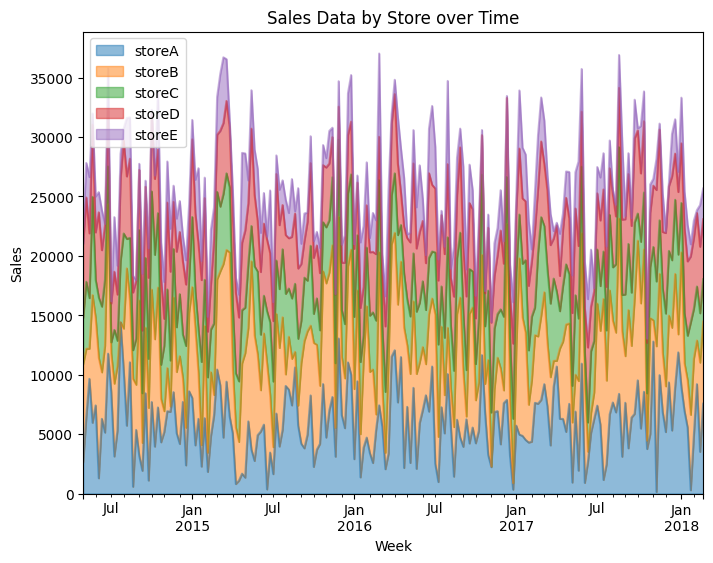

In [10]:
# Create an area plot of the sales data for all columns
df.plot(kind='area', stacked=True, alpha=0.5, figsize=(8, 6))

# Set the title and axis labels
plt.title('Sales Data by Store over Time')
plt.xlabel('Week')
plt.ylabel('Sales')

# Show the plot
plt.show()
# store B iS Contributing the most IN Total sales

In [11]:
# Reset the index of the DataFrame
df=df.reset_index()

# plot sales for the last month
mask=df['week'] >= max(df['week']) - pd.DateOffset(months=1)
last_month_sales=df[mask]
#last_month_sales.head()

# Group the data by week and calculate the sum of sales
sales_by_store = last_month_sales.groupby('week')[['storeA', 'storeB', 'storeC', 'storeD', 'storeE']].sum().sum()
print(sales_by_store)

highest_sales_store = sales_by_store.idxmax()
print(highest_sales_store)

storeA    25409
storeB    30946
storeC    24206
storeD    28341
storeE     8815
dtype: int64
storeB


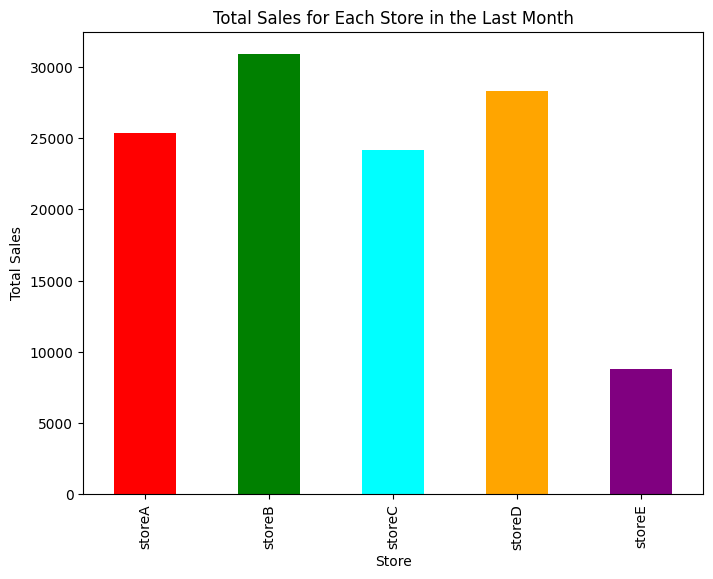

In [12]:
# Define the colors for each bar
colors = ['red', 'green', 'cyan', 'orange', 'purple']

# Create a bar plot of the total sales for each store
sales_by_store.plot(kind='bar',color=colors, figsize=(8,6))

# Set the title and axis labels
plt.title('Total Sales for Each Store in the Last Month')
plt.xlabel('Store')
plt.ylabel('Total Sales')

# Show the plot
plt.show()

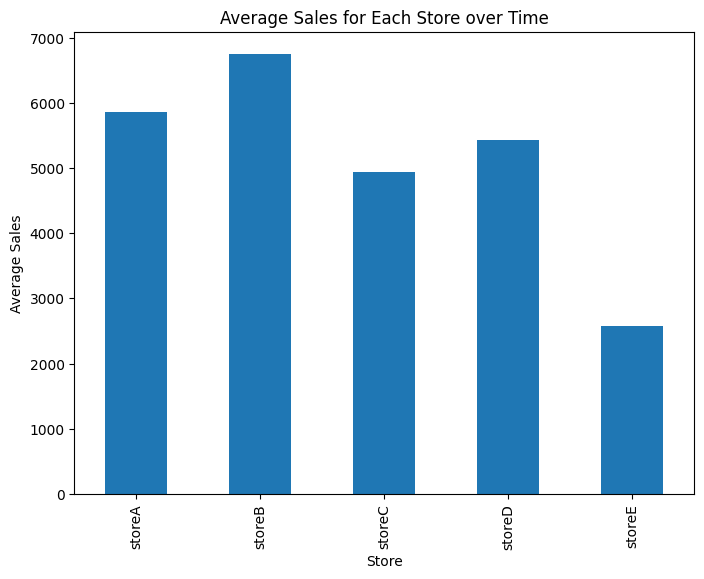

In [13]:
# plot average sales

# Group the data by week and calculate the sum of sales for each store
sales_by_store_and_week = df.groupby('week')[['storeA', 'storeB', 'storeC', 'storeD', 'storeE']].sum()

# Calculate the average sales for each store over time
average_sales = sales_by_store_and_week.mean()

# Create a bar plot of the average sales for each store over time
average_sales.plot(kind='bar', figsize=(8, 6))

# Set the title and axis labels
plt.title('Average Sales for Each Store over Time')
plt.xlabel('Store')
plt.ylabel('Average Sales')

# Show the plot
plt.show()

storeA    2054
storeB    1390
storeC    5112
storeD    5513
storeE    2536
dtype: int64


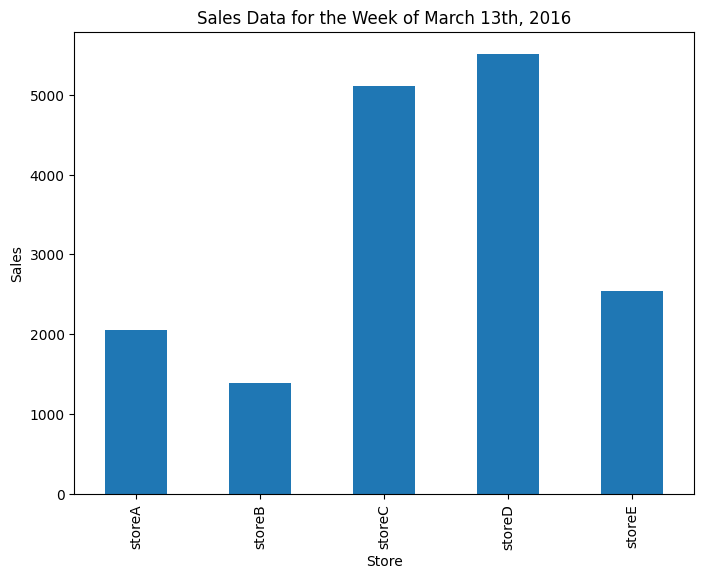

In [20]:
# plot sales for the week of March 13th, 2016
week_mask = df['week'] == pd.to_datetime('2016-03-13')
numeric_data = df[week_mask].select_dtypes(include='number')
week_sales = numeric_data.sum()
print(week_sales)
week_sales.plot(kind='bar', figsize=(8, 6))

# Set the title and axis labels
plt.title('Sales Data for the Week of March 13th, 2016')
plt.xlabel('Store')
plt.ylabel('Sales')
plt.show()

In [15]:
# plot sales for the lastest 3-month period

# plot sales for the last 3 month
mask=df['week'] >= max(df['week']) - pd.DateOffset(months=3)
last_month_sales=df[mask]
#last_month_sales.head()

# Group the data by week and calculate the sum of sales
sales_by_store = last_month_sales.groupby('week')[['storeA', 'storeB', 'storeC', 'storeD', 'storeE']].sum().sum()
print(sales_by_store)

highest_sales_store = sales_by_store.idxmax()
print(highest_sales_store)

storeA    94457
storeB    84405
storeC    71939
storeD    79926
storeE    30566
dtype: int64
storeA


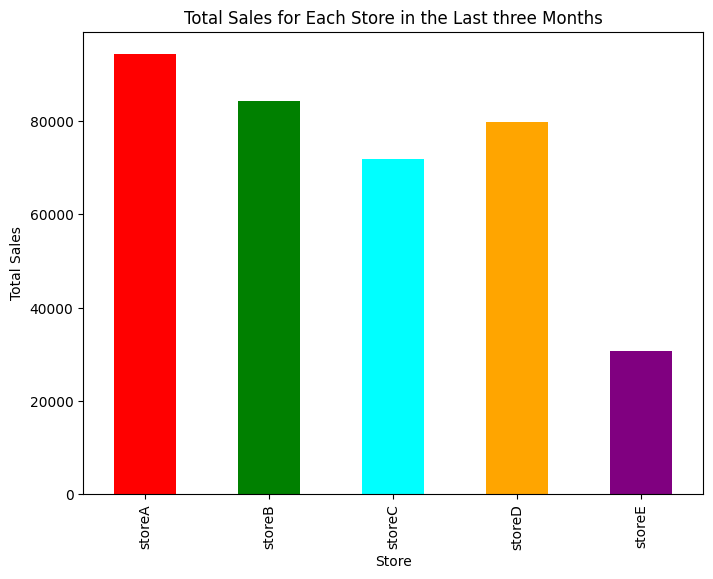

In [16]:
# Define the colors for each bar
colors = ['red', 'green', 'cyan', 'orange', 'purple']

# Create a bar plot of the total sales for each store
sales_by_store.plot(kind='bar',color=colors, figsize=(8,6))

# Set the title and axis labels
plt.title('Total Sales for Each Store in the Last three Months')
plt.xlabel('Store')
plt.ylabel('Total Sales')

# Show the plot
plt.show()


In [17]:
# Calculate the standard deviation of sales for each store
store_std = df.groupby('week')[['storeA', 'storeB', 'storeC', 'storeD', 'storeE']].sum().std()

# Identify the store with the lowest standard deviation
most_consistent_store = store_std.idxmin()

print("The most consistent store is Store", most_consistent_store)

The most consistent store is Store storeD
